In [2]:
import time
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

# 获取数据

In [3]:
# 获取鸢尾花数据集,数据包含三种鸢尾花的四个特征,四个特征分别如下
# sepal length（花萼长度(cm)）
# sepal width（花萼宽度(cm)）
# petal length（花瓣长度(cm)）
# petal width（花瓣宽度(cm)）
from sklearn.datasets import load_iris 
iris = load_iris()  ## 获取鸢尾花数据集，特征分别是sepal length、sepal width、petal length、petal width
X = iris.data[:,2:]  # 通过花瓣的两个特征来聚类

# 用算法原理编写K-Means算法

In [4]:
import numpy as np
def distEclud(vecA,vecB):
    """
    计算两个向量的欧式距离
    """
    return np.sqrt(np.sum(np.power(vecA-vecB,2)))

def randCent(dataSet,k):
    """
    随机生成k个点作为质心，其中质心均在整个数据数据的边界之内
    """
    n=dataSet.shape[1] # 获取数据的维度
    centroids = np.mat(np.zeros((k,n)))
    for j in range(n):
        minJ = np.min(dataSet[:,j])
        rangeJ = np.float(np.max(dataSet[:,j])-minJ)
        centroids[:,j] = minJ+rangeJ*np.random.rand(k,1)
    return centroids

def kMeans(dataSet,k,distMeas=distEclud, createCent=randCent):
    """
    k-Means聚类算法,返回最终的k各质心和点的分配结果
    """
    m = dataSet.shape[0]  #获取样本数量
    # 构建一个簇分配结果矩阵，共两列，第一列为样本所属的簇类值，第二列为样本到簇质心的误差
    clusterAssment = np.mat(np.zeros((m,2)))
    # 1. 初始化k个质心
    centroids = createCent(dataSet,k) 
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            minDist = np.inf
            minIndex = -1
            # 2. 找出最近的质心
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            # 3. 更新每一行样本所属的簇
            if clusterAssment[i,0] != minIndex:
                clusterChanged = True
            clusterAssment[i,:]=minIndex,minDist**2
        print(centroids) # 打印质心
        # 4. 更新质心
        for cent in range(k):
            ptsClust = dataSet[np.nonzero(clusterAssment[:,0].A==cent)[0]] # 获取给定簇的所有点
            centroids[cent,:] = np.mean(ptsClust,axis=0) # 沿矩阵列的方向求均值
    return centroids,clusterAssment

[[1.50872709 1.27377536]
 [1.65485332 1.75455158]
 [6.08211903 0.88139858]]
[[1.462      0.246     ]
 [3.4625     1.0625    ]
 [5.03152174 1.72934783]]
[[1.462      0.246     ]
 [3.84782609 1.1826087 ]
 [5.22207792 1.82337662]]
[[1.462      0.246     ]
 [4.06388889 1.25555556]
 [5.3796875  1.9125    ]]
[[1.462      0.246     ]
 [4.19130435 1.30217391]
 [5.51481481 1.99444444]]
[[1.462      0.246     ]
 [4.22083333 1.31041667]
 [5.53846154 2.01346154]]
[[1.462      0.246     ]
 [4.25490196 1.33921569]
 [5.58367347 2.02653061]]
[[1.462      0.246     ]
 [4.26923077 1.34230769]
 [5.59583333 2.0375    ]]
用K-Means算法原理聚类耗时： 0.20244646072387695


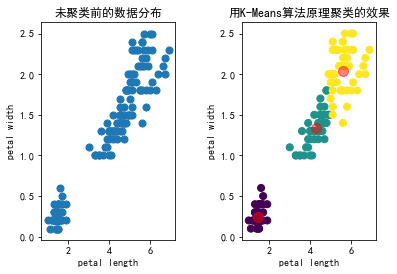

In [5]:
s=time.time()
myCentroids,clustAssing=kMeans(X,3)  # myCentroids为簇质心
print("用K-Means算法原理聚类耗时：",time.time()-s)
centroids=myCentroids.A # 将matrix转换为ndarray类型
# 获取聚类后的样本所属的簇值，将matrix转换为ndarray
y_kmeans=clustAssing[:,0].A[:,0]
# 未聚类前的数据分布
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title("未聚类前的数据分布")
plt.subplots_adjust(wspace=0.5)
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
# x0 = X[np.nonzero(clustAssing[:,0]==0)[0]]
# x1 = X[np.nonzero(clustAssing[:,0]==1)[0]]
# x2 = X[np.nonzero(clustAssing[:,0]==2)[0]]
# plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='label0')
# plt.scatter(x1[:, 0], x1[:, 1], c = "green", marker='*', label='label1')
# plt.scatter(x2[:, 0], x2[:, 1], c = "blue", marker='+', label='label2')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, alpha=0.5)
plt.xlabel('petal length')
plt.ylabel('petal width')
# plt.legend(loc=2)
plt.title("用K-Means算法原理聚类的效果")
plt.show()  

# 二分K-Means算法

In [6]:
def biKmeans(dataSet, k, distMeas=distEclud):
    m = dataSet.shape[0]
    # 创建矩阵来存储每个点的簇的分配结果
    clusterAssment = np.mat(np.zeros((m,2)))
    # 创建初始簇质心
    centroid0 = np.mean(dataSet,axis=0).tolist()[0]
    # 用centList列表保存所有质心
    centList = [centroid0]
    # 计算每个点到质心的误差值
    for j in range(m):
        clusterAssment[j,1] = distMeas(np.mat(centroid0),dataSet[j,:])**2
    while (len(centList) < k):
        lowestSSE = np.inf
        for i in range(len(centList)):
            # 获取当前簇的所有数据
            ptsInCurrCluster = dataSet[np.nonzero(clusterAssment[:,0].A == i)[0],:]
            # 对该簇的数据进行K-Means聚类
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster,2,distMeas)
            sseSplit = sum(splitClustAss[:,1]) # 该簇聚类后的sse
            sseNotSplit = sum(clusterAssment[np.nonzero(clusterAssment[:,0].A != i)[0],1]) # 获取剩余收据集的sse
            # 若该簇划分后的误差和剩余数据的误差之和作为本次最终误差
            # 若本次划分的SSE值最小，则本次划分保存，即执行划分操作
            if (sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        # 将簇编号0,1更新为划分簇和新加入簇的编号
        bestClustAss[np.nonzero(bestClustAss[:,0].A == 1)[0],0]= len(centList)
        bestClustAss[np.nonzero(bestClustAss[:,0].A == 0)[0],0]= bestCentToSplit

        print("the bestCentToSplit is: ",bestCentToSplit)
        print("the len of bestClustAss is: ",len(bestClustAss))
        # 更新质心，新的质心会被增加到centList列表中
        centList[bestCentToSplit] = bestNewCents[0,:]
        centList.append(bestNewCents[1,:])

        # 更新簇的分配结果
        clusterAssment[np.nonzero(clusterAssment[:,0].A == bestCentToSplit)[0],:] = bestClustAss
    return centList, clusterAssment
    

[[5.2172841  1.9391939 ]
 [4.3433217  0.91191479]]
[[5.46842105 1.97368421]
 [2.70967742 0.72473118]]
[[5.17160494 1.79876543]
 [2.09855072 0.49565217]]
[[4.98947368 1.71052632]
 [1.63090909 0.31636364]]
[[4.95876289 1.69587629]
 [1.56037736 0.29056604]]
[[4.92525253 1.68181818]
 [1.49215686 0.2627451 ]]
the bestCentToSplit is:  0
the len of bestClustAss is:  150
[[5.57828131 2.26208798]
 [6.82904328 1.15847409]]
[[4.83404255 1.6606383 ]
 [6.64       2.08      ]]
[[4.6425     1.5775    ]
 [6.11578947 2.12105263]]
[[4.48823529 1.49264706]
 [5.88387097 2.09677419]]
[[4.42258065 1.42903226]
 [5.76756757 2.10540541]]
[[4.37758621 1.39655172]
 [5.7        2.08536585]]
[[4.36666667 1.3877193 ]
 [5.68333333 2.08095238]]
[[4.34363636 1.37272727]
 [5.65227273 2.06818182]]
[[2.89174634 0.1486599 ]
 [2.99801244 0.15180966]]
[[1.462 0.246]
 [3.    1.1  ]]
the bestCentToSplit is:  0
the len of bestClustAss is:  99
用二分K-Means算法原理聚类耗时： 0.17553043365478516
[matrix([[4.34363636, 1.37272727]]), matrix([

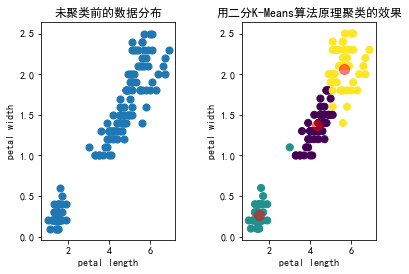

In [15]:
s=time.time()
myCentroids,clustAssing=biKmeans(X,3)  # myCentroids为簇质心
print("用二分K-Means算法原理聚类耗时：",time.time()-s)
centroids= np.array([i.A.tolist()[0] for i in myCentroids]) # 将matrix转换为ndarray类型
# 获取聚类后的样本所属的簇值，将matrix转换为ndarray
y_kmeans=clustAssing[:,0].A[:,0]
# 未聚类前的数据分布
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title("未聚类前的数据分布")
plt.subplots_adjust(wspace=0.5)
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
# x0 = X[np.nonzero(clustAssing[:,0]==0)[0]]
# x1 = X[np.nonzero(clustAssing[:,0]==1)[0]]
# x2 = X[np.nonzero(clustAssing[:,0]==2)[0]]
# plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='label0')
# plt.scatter(x1[:, 0], x1[:, 1], c = "green", marker='*', label='label1')
# plt.scatter(x2[:, 0], x2[:, 1], c = "blue", marker='+', label='label2')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, alpha=0.5)
plt.xlabel('petal length')
plt.ylabel('petal width')
# plt.legend(loc=2)
plt.title("用二分K-Means算法原理聚类的效果")
plt.show()  